# ML: Classification Metrics (CM)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0', 'label'], axis = 1, inplace = True)
demo1.head()   

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


<pre>1 -> Spam
0 -> Non Spam</pre>

In [12]:
demo1.label_num.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

There are about 1500 Spam emails and 3700 Non Spam emails.

In [15]:
dt = pd.read_csv('Spam_finalData.csv')
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [17]:
dt.label_num.value_counts(normalize = True) * 100

0    71.01141
1    28.98859
Name: label_num, dtype: float64

In [20]:
# for saving some time, we are skipping hyper-parameter tuning and hence, validation part 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dt.drop(['label_num'], axis = 1), dt['label_num'])

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print('Model Accuracy: ', model.score(X_test, y_test))

Model Accuracy:  0.934261407579273


The model is performing correct classification 94% of the times.

Is it actually good?

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[866  64]
 [ 21 342]]


true label being i-th class and predicted label being j-th class.

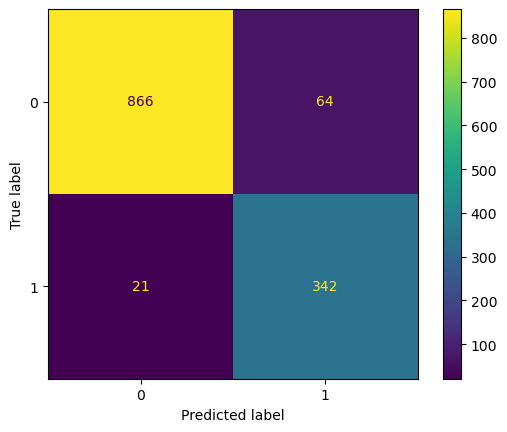

In [24]:
ConfusionMatrixDisplay(cm).plot()

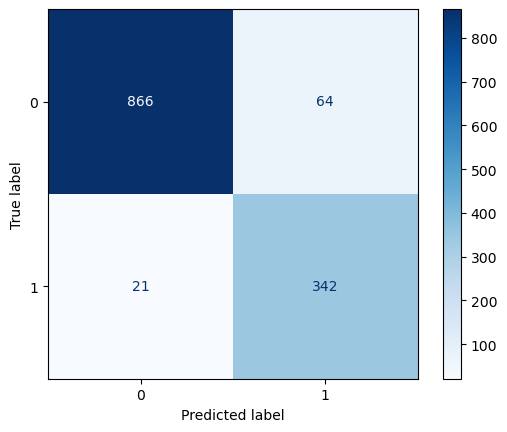

In [29]:
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues')

In [30]:
# accuracy using cm
np.sum(np.diag(cm)) / np.sum(cm)

0.934261407579273

In [31]:
from sklearn.metrics import precision_score, recall_score

In [32]:
precision_score(y_test, y_pred)

0.8423645320197044

In [33]:
recall_score(y_test, y_pred)

0.9421487603305785

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/